In [1]:
# NOTE : Under EDA
# 1. Summary Statistics 2. Distribution 3. Grouping 4. Crosstabs,Pivots
import pandas as pd
import numpy as np
import os

In [3]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [4]:
# getting the dataset
train_df = pd.read_csv(train_file_path,index_col='PassengerId')
test_df = pd.read_csv(test_file_path,index_col='PassengerId')

In [5]:
# merging them into one dataframe
df = pd.concat((train_df,test_df),axis=0)
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


## EDA 2
### Distribution
1) Univariate ( one variable )
    - Histogram
    - Kernel Density Estimation (KDE) plot
    
2) Bivariate (dist of two features at once) 
    - Scatter plot
    
1.a) Histogram : represents dist of values in diff bins(buckets)
   ex. - bin no    bucket     freq
       -    1      6-8        2
       -    2      8-12       3
   here bucket is range with 6<=value< 9 . histogram will be freq ( y axis) and bin ( x-axis)
   
  b) KDE plot
  - here we talk about probability instead of freq
  NOTE : probab is directly related to freq
  - kde plot will have a smooth curve instead of bars like in historam
  
Q. What are we looking for in KDE plot ? 
-. Ans. Skewness
Note : Normal Distribution
-. perfect normal dist can act as standard due to
    a) bell curve and symmetric along the central line or y axis
   ie. 50% values have lower value than central line and 50% higher .'. central line is median
   b) in perfectly normal dist mean line is same as median line 
   ie. no skewness
   but ( right skewed, mean right to median and skewness value>0 or left skewed, mean left to median 

- Ques : Why Normal Distribution
- Answer 1 : Central limit theorem - The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance,  when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed
    ex. generate random numbers between 1 and 10 with some n numbers in sample space, calculate mean of the sample space and plot many means of many random sample spaces of n numbers, histogram will be a normal dist.
    
- Answer 2: practically 
    - a) Because it makes the math simpler. pdf is exponenital of quadratic. Taking the logarithm (as you often do, because you want to maximize the log likelihood) gives you a quadratic. Differentiating this (to find the maximum) gives you a set of linear equations, which are easy to solve analytically.
    - b) It's simple - the entire distribution is described by two numbers, the mean and variance.
    - c) It's familiar to most people

- Answer 3: 
    - a) The sum of several random variables (like dice) tends to be Gaussian. (Central Limit Theorem).
    - b) Usually the data distribution in Nature follows a Normal distribution ( few examples like - age, income, height, weight etc., ) . So its the best approximation when we are not aware of the underlying distribution pattern.
    - c) Most often the goal in ML/ AI is to strive to make the data linearly separable even if it means projecting the data into higher dimensional space so as to find a fitting "hyperplane" (for example - SVM kernels, Neural net layers, Softmax etc.,).
    - d) if our X is normally distributed and y is also normally distributed, you are most likely to fit a straight line that has many points centered in the middle of the line rather than the end-points (aka outliers, leverage / influencing points). So the predicted regression line will most likely suffer little variance when predicting on unseen data.
- Note : we can use other dist if perfomance is not good after using normal dist but it needs to have finite variance.

### Demo : Univariate Dist

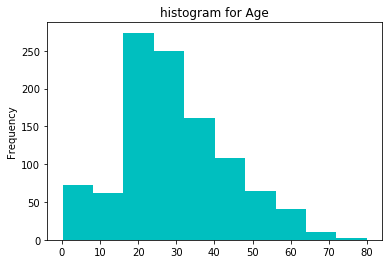

In [29]:
%matplotlib inline
# df.Age.plot(kind='hist',title='histogram for Age',color='c');

#------------- for trying--- : another approach for trying
#import matplotlib.pyplot as plt
#x = df.Age
#plt.hist(x[x.notnull()])

mean 29.881137667304014
median 28.0


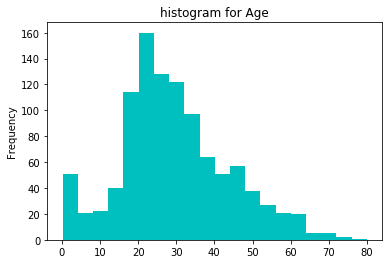

In [30]:
# Pandas by defualt select some bins
# we can add or remove bins
df.Age.plot(kind='hist',title='histogram for Age',color='c',bins=20);
# the output as we can see is positively skewed
print("mean",df.Age.mean())
print("median",df.Age.median())
# mean is 29, median is 28 ie. right skewed.
# median shows that for value less than 28 and greater than 28 number of entries are same
# mean 29 shows higher age people are having more effect on mean than lower age people ( by comparing with median)

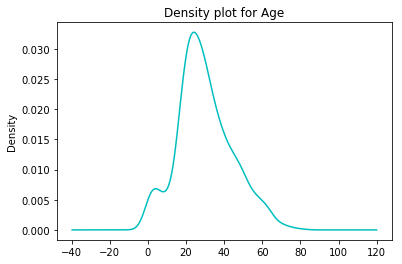

In [31]:
# KDE plot 
df.Age.plot(kind='kde',title='Density plot for Age',color='c');

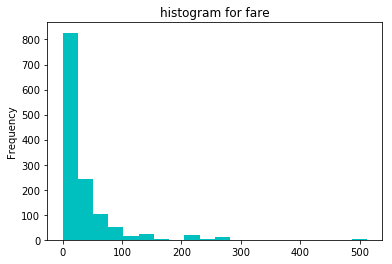

In [59]:
# histogram for fare
df.Fare.plot(kind='hist',title='histogram for fare',color='c',bins=20)
# this is a very highly skewed distribution

In [33]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


## Part 2 : distribution
-> 2. Bivariate distribution 
a) Scatter plot : Gives the correlation between two variables
ie. a pattern between the variables 

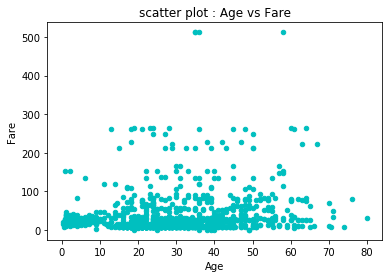

In [34]:
# use scatter plot for bivariate dist
df.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot : Age vs Fare');


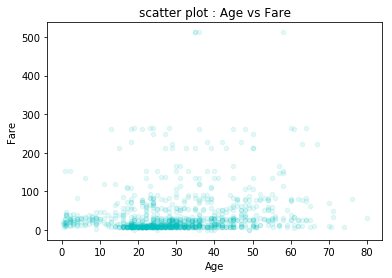

In [43]:
# Here many values are clutered together and overlap each other
# .'. Use ALPHA value trick
# use alpha to set the transparency
# alpha range 0-1, 0= transparent , 1= opaque
df.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot : Age vs Fare',alpha=0.1)

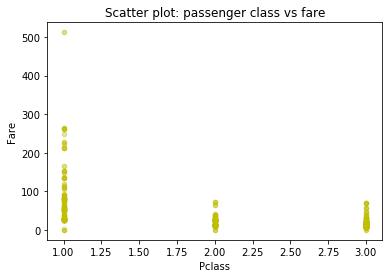

In [42]:
# passenger class vs fare
df.plot.scatter(x='Pclass', y='Fare',color='y',title='Scatter plot: passenger class vs fare', alpha=0.15);

## Grouping or Aggregation

In [52]:
df.groupby('Sex').Age.median()
# we can groupby numnerical column also but no meaning

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [60]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [61]:
df.groupby('Pclass').Age.median()
# -- another way--
#df.groupby('Pclass')['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [62]:
# if we want median on more columns
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [66]:
# different type of summary statistics in one go
# inside agg we pass a dictionary
df.groupby(['Pclass']).agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [67]:
# more complicated aggregations
aggregations = {
    'Fare':{
        'mean_Fare':'mean',
        'median_Fare':'median',
        'max_Fare':max,
        'min_Fare':np.min
    },
    'Age':{
        'median_Age':'median',
        'min_Age':min,
        'max_Age':max,
        'range_Age': lambda x: max(x) - min(x) # calc age range per group
    }
}

In [68]:
df.groupby(['Pclass']).agg(aggregations)

C:\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [70]:
# grouping based on more than one variable
df.groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

## Crosstab for categorical features
-. crosstabulation : we put the number of observation for each combination of columns

In [59]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex,df.Pclass)
# get the number of value for combination of categories of two columns


Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


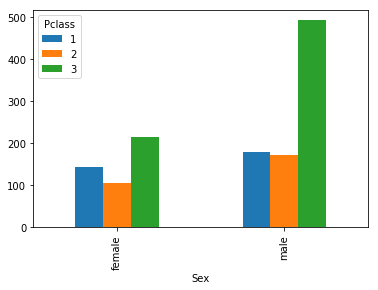

In [71]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

In [42]:
# Pivot table is similar to cross tab, where cross tab gave count of values 
# pivot table gives values of a third column and mean of values according to categories
#ex. x-axis:Pclass, y-axis:Gender, values are from column Age and mean of them

df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')
#NOTE: pivot table is useful if we want to work on any numerical feature with combo to two categorical features


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [43]:
df.groupby(['Sex','Pclass']).Age.mean()
# here values are stacked over each other

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [44]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
